# [Day 19 - Monster Messages](https://adventofcode.com/2020/day/19)
## Part 1

In [1]:
import regex

rules, messages = open("inputs/19-input.txt").read().split("\n\n")

rules = rules.splitlines()
messages = messages.splitlines()

# Turn rule into dict expression {key: value}
def rule_to_dict(r):
    r = r.replace('\"', '')
    return eval('{\"'+r.replace(': ', '\":\"')+'\"}')

# Create rule dict with numbers in values
rule_dict = {}
for r in rules:
    rule_dict.update(rule_to_dict(r))

# Recursive function to replace numbers with their rule
def complete_rule(s:str, rules:dict):
    rule = rules[s]
    for d in regex.findall("\d+",rule):
        rule = regex.sub(rf'(?<!\d){d}(?!\d)', complete_rule(d, rules), rule)
    if len(regex.sub(r'\s|\|','',rule)) > 1:
        rule = f"({rule})"
    if not regex.search("\d", rule):
        rule = rule.replace(" ","")
    return rule

# Pattern for rule 0
pattern = regex.compile(complete_rule("0", rule_dict))
# Number of messages matching the pattern
sum([bool(pattern.fullmatch(m)) for m in messages])

291

## Part 2

Rule 0: `8 11`

**New rules**
- Rule 8: `42` -> `42 | 42 8`
- Rule 11: `42 31` -> `42 31 | 42 11 31`

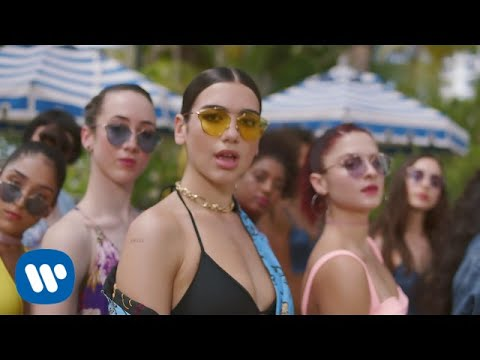

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('k2qgadSvNyU', width=800, height=300)

In [3]:
r42 = complete_rule("42", rule_dict)
r31 = complete_rule("31", rule_dict)

# New rule 8 is repetitions of rule 42
r8 = f"{r42}+"

# New rule 11 is rule 42 and rule 31 repeated the same number of times.
# Only works on its own because (?R) applies to entire regex
r11 = f"({r42})(?R)?({r31})"

def r0_match(s):
    # Remove opening r42...
    while regex.search(f"^{r42}",s):
        s = regex.sub(f"^{r42}","",s)
        #...and check if remainder matches r11
        if regex.fullmatch(r11,s):
            return True
    return False

sum([r0_match(m) for m in messages])

409